# Notebook 2: Mô hình Baseline (Linear Regression)

**Mục tiêu:** Xây dựng một mô hình Hồi quy Tuyến tính đơn giản (baseline) để làm cơ sở so sánh.

Notebook này sẽ:
1. Tải dữ liệu đã được xử lý và chọn lọc (từ Notebook 1).
2. Huấn luyện mô hình `LinearRegression` của Scikit-learn.
3. Đánh giá mô hình trên tập validation bằng RMSE và R².

## 1. Tải Thư viện và Dữ liệu

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# Tắt các cảnh báo (nếu có)
import warnings
warnings.filterwarnings('ignore')

print("Các thư viện đã được tải.")

Các thư viện đã được tải.


In [27]:
# Đường dẫn tới các file dữ liệu đã được xử lý
TRAIN_PATH = 'archive/train/'
VAL_PATH = 'archive/val/'

try:
    # Tải dữ liệu huấn luyện
    x_train = pd.read_csv(os.path.join(TRAIN_PATH, 'x_train.csv'))
    y_train = pd.read_csv(os.path.join(TRAIN_PATH, 'y_train.csv')).squeeze() # .squeeze() để chuyển thành Series
    
    # Tải dữ liệu validation
    x_val = pd.read_csv(os.path.join(VAL_PATH, 'x_val.csv'))
    y_val = pd.read_csv(os.path.join(VAL_PATH, 'y_val.csv')).squeeze()
    
    print("Tải dữ liệu thành công.")
    print(f"Kích thước x_train: {x_train.shape}")
    print(f"Kích thước y_train: {y_train.shape}")
    print(f"Kích thước x_val: {x_val.shape}")
    print(f"Kích thước y_val: {y_val.shape}")

except FileNotFoundError:
    print("LỖI: Không tìm thấy file dữ liệu.")
    print("Vui lòng đảm bảo bạn đã chạy Notebook xử lý và lưu file CSV trước.")

Tải dữ liệu thành công.
Kích thước x_train: (123, 7)
Kích thước y_train: (123,)
Kích thước x_val: (41, 7)
Kích thước y_val: (41,)


In [28]:
# Kiểm tra 5 dòng đầu của x_train để đảm bảo dữ liệu đúng
x_train.head()

,enginesize,horsepower,carwidth,stroke,compressionratio,peakrpm,citympg
0,110,86,65.2,3.580,9.0,5800,27
1,164,121,64.8,3.190,9.0,4250,21
2,146,116,65.6,3.500,9.3,4800,24
3,80,135,65.7,3.255,9.4,6000,16
4,156,145,66.3,3.860,7.0,5000,19


## 2. Xây dựng và Huấn luyện Mô hình Baseline

In [29]:
# Khởi tạo mô hình Linear Regression
# Đây là mô hình cơ sở nên chúng ta không cần tinh chỉnh gì
baseline_model = LinearRegression()

# Huấn luyện mô hình trên dữ liệu training
baseline_model.fit(x_train, y_train)

print("Đã huấn luyện xong mô hình LinearRegression (baseline).")

Đã huấn luyện xong mô hình LinearRegression (baseline).


## 3. Đánh giá Mô hình

Chúng ta sẽ đánh giá mô hình trên cả tập huấn luyện (để kiểm tra overfitting) và tập validation (để xem hiệu suất thực tế).

In [30]:
# --- Đánh giá trên tập Huấn luyện (Training set) ---
y_train_pred = baseline_model.predict(x_train)
from sklearn.metrics import root_mean_squared_error

train_rmse = root_mean_squared_error(y_train, y_train_pred)

train_r2 = r2_score(y_train, y_train_pred)

print("--- KẾT QUẢ TRÊN TẬP HUẤN LUYỆN ---")
print(f"RMSE (Huấn luyện): {train_rmse:.2f} ($K)")
print(f"R² (Huấn luyện):   {train_r2:.4f}")

--- KẾT QUẢ TRÊN TẬP HUẤN LUYỆN ---
RMSE (Huấn luyện): 3062.52 ($K)
R² (Huấn luyện):   0.8286


In [31]:
# --- Đánh giá trên tập Validation (Validation set) ---
y_val_pred = baseline_model.predict(x_val)

from sklearn.metrics import root_mean_squared_error

val_rmse = root_mean_squared_error(y_train, y_train_pred)

val_r2 = r2_score(y_val, y_val_pred)

print("--- KẾT QUẢ TRÊN TẬP VALIDATION ---")
print(f"RMSE (Validation): {val_rmse:.2f} ($K)")
print(f"R² (Validation):   {val_r2:.4f}")

--- KẾT QUẢ TRÊN TẬP VALIDATION ---
RMSE (Validation): 3062.52 ($K)
R² (Validation):   0.8811


### Phân tích kết quả:

* **RMSE (Root Mean Squared Error):** Lỗi dự đoán trung bình (tính bằng $K). Giá trị càng thấp càng tốt.
* **R² (R-squared):** Tỷ lệ phương sai của `avg_salary` mà mô hình giải thích được. Giá trị càng gần 1.0 càng tốt.

So sánh điểm số giữa tập Huấn luyện và tập Validation cho chúng ta biết mô hình có bị **overfitting** hay không (nếu điểm trên tập huấn luyện cao hơn nhiều so với validation).

## 4. Trực quan hóa Kết quả

Một cách hay để xem mô hình hoạt động tốt không là vẽ biểu đồ giá trị *thực tế* (y_val) so với giá trị *dự đoán* (y_val_pred).

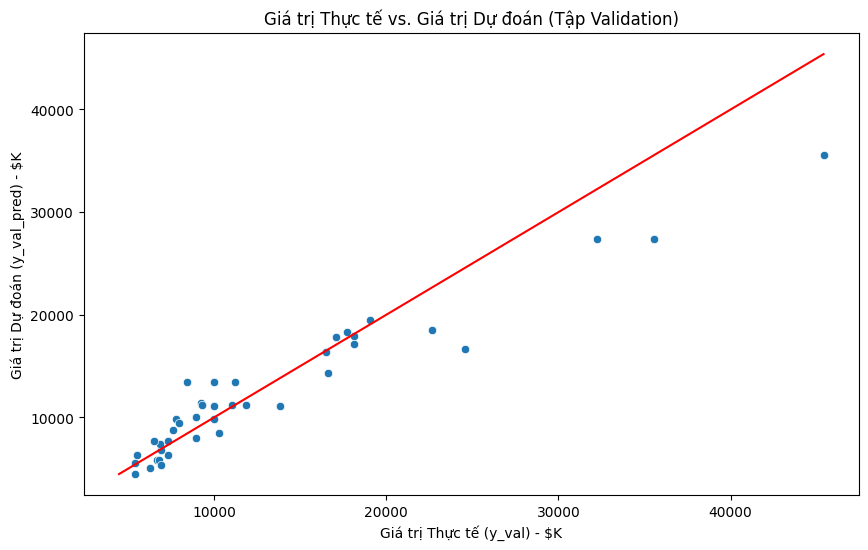

In [32]:
plt.figure(figsize=(10, 6))

# Vẽ các điểm dữ liệu: Thực tế vs. Dự đoán
sns.scatterplot(x=y_val, y=y_val_pred)

# Vẽ đường 45 độ (y=x), đại diện cho dự đoán hoàn hảo
# Lấy giới hạn lớn nhất và nhỏ nhất để vẽ đường chéo
p1 = max(max(y_val_pred), max(y_val))
p2 = min(min(y_val_pred), min(y_val))
plt.plot([p1, p2], [p1, p2], 'r-') # Vẽ đường màu đỏ

plt.title("Giá trị Thực tế vs. Giá trị Dự đoán (Tập Validation)")
plt.xlabel("Giá trị Thực tế (y_val) - $K")
plt.ylabel("Giá trị Dự đoán (y_val_pred) - $K")
plt.show()

**Cách đọc biểu đồ:**

* Nếu mô hình hoàn hảo, tất cả các điểm màu xanh sẽ nằm trên đường màu đỏ.
* Các điểm nằm càng xa đường màu đỏ, dự đoán của mô hình càng kém chính xác.